# Summary file exploration

Today we're going to explore the summary file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/atussum-0319/atussum_0319.dat")

In [3]:
df.head()

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,0
2,20030100013352,1,-1,41,2,1,26,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,20030100013848,2,-1,39,2,2,36,4,-1,2,...,0,0,0,0,0,0,0,0,0,0
4,20030100014165,2,-1,45,2,1,51,1,2,-1,...,0,0,0,0,0,0,0,0,0,0


Ok, I have no idea what these first columns  mean, but I recognize the things that start with *t*, those are activity codes. Let's look at the data dictionary.

----

Aha! `GEMETSTA` refers to `Metropolitan status` and `TEMJOT` refers to `in the last seven days did you have more than one job?`. So these codes are information about the respondent.

----

Let's check all of the columns just to make sure there aren't hidden gems.

In [4]:
df.columns.values

array(['TUCASEID', 'GEMETSTA', 'GTMETSTA', 'PEEDUCA', 'PEHSPNON',
       'PTDTRACE', 'TEAGE', 'TELFS', 'TEMJOT', 'TESCHENR', 'TESCHLVL',
       'TESEX', 'TESPEMPNOT', 'TRCHILDNUM', 'TRDPFTPT', 'TRERNWA',
       'TRHOLIDAY', 'TRSPFTPT', 'TRSPPRES', 'TRYHHCHILD', 'TUDIARYDAY',
       'TUFNWGTP', 'TEHRUSLT', 'TUYEAR', 't010101', 't010102', 't010199',
       't010201', 't010299', 't010301', 't010399', 't010401', 't010499',
       't010501', 't010599', 't019999', 't020101', 't020102', 't020103',
       't020104', 't020199', 't020201', 't020202', 't020203', 't020299',
       't020301', 't020302', 't020303', 't020399', 't020401', 't020402',
       't020499', 't020501', 't020502', 't020599', 't020681', 't020699',
       't020701', 't020799', 't020801', 't020899', 't020901', 't020902',
       't020903', 't020904', 't020905', 't020999', 't029999', 't030101',
       't030102', 't030103', 't030104', 't030105', 't030108', 't030109',
       't030110', 't030111', 't030112', 't030186', 't030199', 't03

In [5]:
df["t050101"].describe()

count    210586.000000
mean        150.302807
std         235.063748
min           0.000000
25%           0.000000
50%           0.000000
75%         360.000000
max        1420.000000
Name: t050101, dtype: float64

Nah, looks like everything makes sense. On simple thing would be to take the average of all the columns grouped by year and there's your distribution.

In [6]:
summary = df.filter(regex=("TUYEAR|t.*")).groupby("TUYEAR").agg(np.mean).apply(lambda x: x / 60, axis=1)
summary

,t010101,t010102,t010199,t010201,t010299,t010301,t010399,t010401,t010499,t010501,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
TUYEAR,,,,,,,,,,,,,,,,,,,,,
2003,8.685372,0.032151,0.000000,0.668946,0.000869,0.077572,0.002783,0.013205,0.000820,0.000016,...,0.001110,0.000290,0.043978,0.061519,0.010792,0.020802,0.004261,0.048474,0.004323,0.005161
2004,8.654488,0.047672,0.000000,0.668348,0.000197,0.096374,0.002108,0.009472,0.000376,0.000000,...,0.000716,0.000072,0.025537,0.051264,0.004374,0.003928,0.003113,0.062548,0.001227,0.000000
2005,8.687283,0.064767,0.000115,0.657782,0.000192,0.110078,0.002525,0.015025,0.000000,0.000096,...,0.000419,0.000460,0.014889,0.069666,0.004437,0.006260,0.004489,0.073493,0.002006,0.000000
2006,8.708752,0.069416,0.000000,0.661065,0.000193,0.090944,0.002367,0.012431,0.000077,0.000000,...,0.000303,0.000936,0.021617,0.096885,0.011163,0.007285,0.004285,0.069554,0.001369,0.000438
2007,8.681845,0.068547,0.000000,0.661200,0.000231,0.077479,0.002848,0.006883,0.000082,0.000027,...,0.000667,0.000467,0.024607,0.076376,0.009970,0.004329,0.005112,0.083589,0.001798,0.000000
2008,8.721558,0.066458,0.000000,0.666157,0.000571,0.088157,0.000848,0.013690,0.000210,0.000072,...,0.000727,0.000426,0.023722,0.097208,0.008394,0.007817,0.002362,0.065759,0.002640,0.000059
2009,8.756424,0.071383,0.000000,0.658150,0.000697,0.089321,0.003029,0.010428,0.000019,0.000025,...,0.000635,0.000523,0.027718,0.126579,0.011526,0.009840,0.002888,0.071273,0.002986,0.000000
2010,8.787069,0.063912,0.000000,0.677446,0.000936,0.085303,0.002686,0.012829,0.000974,0.000000,...,0.001143,0.000214,0.040351,0.201642,0.019735,0.034018,0.005241,0.057959,0.004453,0.000000
2011,8.794774,0.060464,0.000000,0.678895,0.001531,0.069616,0.002735,0.005202,0.000000,0.000087,...,0.003245,0.001088,0.032179,0.170063,0.011606,0.010324,0.003511,0.051020,0.001261,0.000007


<AxesSubplot:xlabel='TUYEAR'>

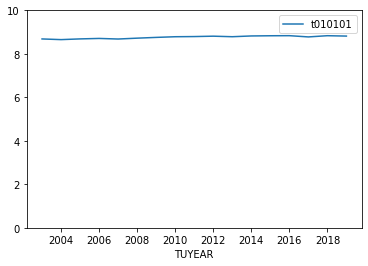

In [7]:
summary.plot.line(y="t010101", ylim=[0,10])

<AxesSubplot:xlabel='TUYEAR'>

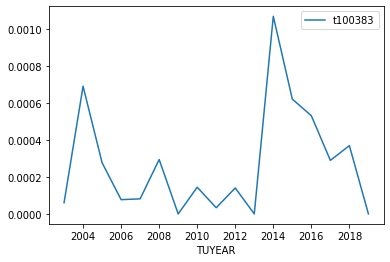

In [8]:
summary.plot.line(y="t100383")

<AxesSubplot:ylabel='2003'>

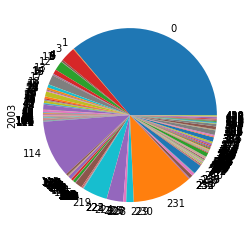

In [9]:
summary.T.reset_index(drop=True).plot.pie(y=2003, legend=False)

That's enough for now, though I'm going to put a mental note for now that it might be interesting to use k-means clustering or some other unsupervised learning technique to find patterns of how people use their time. More on that later.